## SentencePiece 모델 학습

In [1]:
import os

import tensorflow as tf
import numpy as np

path_to_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko'

with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size:", len(raw))

print("Example:")
for sen in raw[0:100][::20]: print(">>", sen)

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


In [2]:
cleaned_corpus = list(set(raw))

In [3]:
max_len = 150
min_len = 10

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

In [4]:
import sentencepiece as spm

temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전에 나왔던 정제했던 corpus를 활용해서 진행해야 합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = unigram이 디폴트 적용되어 있습니다. --model_type = bpe로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm*

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp --model_prefix=korean_spm --vocab_size=8000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp
  input_format: 
  model_prefix: korean_spm
  model_type: UNIGRAM
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id

-rw-r--r-- 1 root root 376816 Nov  7 03:25 korean_spm.model
-rw-r--r-- 1 root root 146213 Nov  7 03:25 korean_spm.vocab


In [5]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1243, 11, 302, 7, 3608, 11, 287, 38, 3]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


In [6]:
print(s.SampleEncodeAsPieces('너무기대안하고갔나재밌게봤다',1, 0.0))
print(s.SampleEncodeAsPieces('굉장히잘만든수작지루할틈이없음',1, 0.0))
print(s.SampleEncodeAsPieces('ㄱㅐOOO같은영화 뭐가무섭다는건지ㅡㅡ/',1, 0.0))
print(s.SampleEncodeAsPieces('ㄴㅓ무합니다이무슨..유치찬란..오글거려못보겠네요',1, 0.0))
print(s.SampleEncodeAsPieces('개봉했을때부터 지금까지 마음이답답하거나 힘들때 이영화 보고있어요 그때마다 심적인 위로를 받을수있는영화같아요 장면 하나하나가 너무예쁘고 마음에 남아서 진한 여운까지 주는영화 감사합니다',1, 0.0))

['▁너무', '기', '대', '안', '하고', '갔', '나', '재', '밌', '게', '봤', '다']
['▁', '굉', '장', '히', '잘', '만', '든', '수', '작', '지', '루', '할', '틈', '이', '없', '음']
['▁개', 'O', 'O', 'O', '같은', '영화', '▁', '뭐', '가', '무', '섭', '다', '는', '건', '지', 'ᅳᅳ', '/']
['▁너무', '합니다', '이', '무', '슨', '.', '.', '유', '치', '찬', '란', '.', '.', '오', '글', '거', '려', '못', '보', '겠', '네', '요']
['▁개봉', '했을', '때', '부터', '▁지금', '까지', '▁마음', '이', '답', '답', '하거나', '▁힘들', '때', '▁이', '영화', '▁보고', '있', '어', '요', '▁그', '때', '마다', '▁심', '적인', '▁위로', '를', '▁받을', '수', '있는', '영화', '같', '아', '요', '▁장면', '▁하나', '하', '나', '가', '▁너무', '예', '쁘', '고', '▁마음', '에', '▁남아', '서', '▁진', '한', '▁여', '운', '까지', '▁주는', '영화', '▁감사', '합니다']


첫번째, 두번째 문장을 보면 띄어쓰기가 안 된 경우 형태소 분석이 깔끔하게 잘 되지 않는 것으로 보인다.

## Tokenizer 함수 작성

In [10]:
def sp_tokenize(s, corpus): 

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({word:idx})
        index_word.update({idx:word})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

## 네이버 영화리뷰 감정 분석 문제에 SentencePiece 적용해 보기

### 데이터 불러오기, 중복 및 결측치 제거

In [11]:
import pandas as pd
from tqdm import tqdm

train_path = 'ratings_train.txt'
test_path = 'ratings_test.txt'
df_train = pd.DataFrame(columns=['review', 'label'])
df_test = pd.DataFrame(columns=['review', 'label'])


In [12]:
# 텍스트 불러오는 과정에서 정규화

import re

def cleaning_text(text, punc, regex):

    for p in punc:
        text = text.replace(p, " " + p + " ")

    text = re.sub(regex, " ", text)

    return text

with open(train_path, 'r') as f:
    raw = f.readlines()
    for index, data in tqdm(enumerate(raw)):
        data = data.split()
        sentence = ' '.join(data[1:-1])
        sentence = cleaning_text(sentence, [",", "?"], "([^a-zA-Z0-9,?\n\uAC00-\uD7A3])")
        label = data[-1]
        df_train.loc[index, 'review'] = sentence
        df_train.loc[index, 'label'] = label


150000it [09:03, 276.18it/s]


In [13]:
df_train.head()

,review,label
0,아 더빙 진짜 짜증나네요 목소리,0
1,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0
3,교도소 이야기구먼 솔직히 재미는 없다 평점 조정,0
4,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [14]:
# 중복값 제거

df_train.drop_duplicates(subset=['review'], keep='first', inplace=True, ignore_index=True)
print(len(df_train))

145596


In [15]:
with open(test_path, 'r') as f:
    raw = f.readlines()
    for index, data in tqdm(enumerate(raw)):
        data = data.split()
        sentence = ' '.join(data[1:-1])
        sentence = cleaning_text(sentence, [",", "?"], "([^a-zA-Z0-9,?\n\uAC00-\uD7A3])")
        label = data[-1]
        df_test.loc[index, 'review'] = sentence
        df_test.loc[index, 'label'] = label

50000it [01:06, 755.00it/s] 


In [16]:
df_test.head()

,review,label
0,굳,1
1,GDNTOPCLASSINTHECLUB,0
2,뭐야 이 평점들은 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,3D만 아니었어도 별 다섯 개 줬을텐데 왜 3D로 나와서 제 심기를 불편하게 하...,0


In [43]:
df_test.drop_duplicates(subset=['review'], keep='first', inplace=True, ignore_index=True)

In [18]:
print(len(df_test))

49008


In [19]:
# 결측값 제거
print(np.sum(df_train.isna().values))
print(np.sum(df_test.isna().values))

0
0


In [20]:
X_train = df_train['review'].values
y_train = df_train['label'].values
X_test = df_test['review'].values
y_test = df_test['label'].values

In [21]:
X = np.concatenate([X_train, X_test])
X.shape

(194604,)

문장의 최단 길이: 0
문장의 최장 길이: 177
문장의 평균 길이: 91


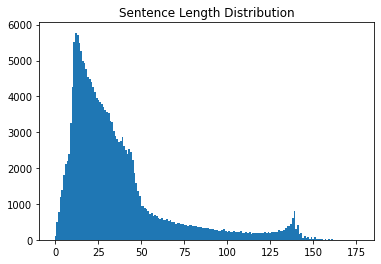

In [22]:
import matplotlib.pyplot as plt

min_len = 999
max_len = 0
sum_len = 0

for sen in X:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=int)

for sen in X:  
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

원본 데이터에 150자 정도의 제한이 있었던 것으로 보인다. 최대 길이는 150으로 정하겠다. 길이가 0 근처인 데이터를 살펴보겠다.

In [23]:
def check_sentence_with_length(data, length):
    count = 0
    
    for sen in data:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

check_sentence_with_length(X, 0)
check_sentence_with_length(X, 1)
check_sentence_with_length(X, 2)
check_sentence_with_length(X, 3)



아
잼
1
4
굿
짱
휴
 
음
즐
굳
네
k
쒯
토
O
똥
z
헐
삼
꽝
풉
왜
쉣
봐
뿌
0
d
흥
찜
귯
린
시
a
c
흠
웅
오
9
쩜
애
헝
쨩
f
움
업
헉
군
b
g
올
걍
허
쀍
로
갑
즛
킥
함
진
잠
곧
h
캬
풋
파
웩
꺅
욜
2
핡
 
굿
헐
d
굳
b
하
1
음
꿈
뻑
땡
좀
g
짱
뷁
찜
헷
쨩
3
싫
0
우
악
쩝
f
오
쒯
h
풋
최고
졸작
대박
버려
망함
굳굳
안습
망작
  
쵝오
굿 
별루
씐나
쓰렉
볼만
허접
비추
좋다
아나
야 
역시
오오
평이
지루
오욈
지송
별로
눈물
당연
쩔어
별노
몰입
졸잼
돋네
오글
이응
첨봄
최악
잼씀
ok
유후
감동
gg
조앙
1점
표절
명작
으휴
에효
 굿
굿잡
잼나
10
우왕
거지
굿굿
좋음
실망
애이
짱임
전설
mm
와우
등록
하위
그닥
뭉클
삼류
HN
윤하
섹시
실화
머냐
수작
꿀잼
동감
dd
굳 
추천
좋아
55
안봐
개쩜
올레
난해
뭐니
뭥미
쓰랙
좇 
오우
미안
걸작
안봄
넓어
 하
야동
의리
완벽
뿌잉
현실
울뻔
좋구나
10점
처 주
솔직히
4대강
재밌다
재밌군
좋았다
재미무
보지마
볼만함
b b
dsa
웃스 
   
재밋네
최고다
재밌음
쓰래기
갑이다
료코짱
2빠닼
만세 
OOO
아하 
재및음
좋아여
재미쪙
대박 
에혀 
 ? 
3 6
가보자
bad
신선함
와우 
즐  
좋아요
아  
쨩이야
굿  
재밋다
지못미
나이스
오짱 
전형적
원주율
좋은테
2 6
보세요
잼없다
다섯개
접어라
쓰중쓰
좋다 
음  
좋군 
싸우자
멋져 
직인다
짱짱짱
별로임
진리임
감동적
최고 
재밌어
걍 굿
아시바
팬이다
별로다
잼있다
감동 
잠온다
의리 
별로 
썩었내
짱멋짐
성룡짱
꿀잼 
쵝오 
괜찮네
막장 
억지 
김서울
철규찡
무셔움
지겨워
꼭보셈
쓰레기
그다지
훌륭함
최고임
꼭봐라
일부심
예스잼
괜찮음
짜증나
쩝  
코메디
굳이다
멋지다


길이가 1인 문장은 정보가 너무 적다. 길이가 2 이상인 경우부터 어느 정도의 긍정/부정 평가가 가능하다고 보인다. 최소 길이를 2, 최대 길이를 150으로 두겠다.

In [24]:
def crop_df(df, min_len=2, max_len=150):
    df = df.copy()
    df['length'] = df['review'].apply(lambda i:((min_len <= len(i)) and (len(i) <= max_len)))
    df_crop = df[df['length']]
    return df_crop

df_train_crop = crop_df(df_train)
df_test_crop = crop_df(df_test)

In [25]:
print(len(df_train_crop))
print(len(df_test_crop))


145316
48901


In [26]:
X_train = df_train_crop['review'].values
y_train = df_train_crop['label'].values.astype('float32')
X_test = df_test_crop['review'].values
y_test = df_test_crop['label'].values.astype('float32')
X = np.concatenate([X_train, X_test])
X.shape

(194217,)

In [27]:
X_tensor, word_index, index_word = sp_tokenize(s, X)

In [28]:
X_sp_train = X_tensor[:len(X_train)]
X_sp_test = X_tensor[len(X_train):]

In [29]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization

embedding_dim = 128 
max_len = 140 
lstm_units = 60

model = Sequential()

model.add(Embedding(vocab_size, embedding_dim, input_length=max_len, mask_zero=True))

model.add(LSTM(lstm_units))

model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 140, 128)          1024000   
_________________________________________________________________
lstm (LSTM)                  (None, 60)                45360     
_________________________________________________________________
dense (Dense)                (None, 10)                610       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 1,069,981
Trainable params: 1,069,981
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_sp_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
909/909 [==============================] - 294s 319ms/step - loss: 0.4256 - accuracy: 0.8037 - val_loss: 0.3832 - val_accuracy: 0.8259
Epoch 2/10
909/909 [==============================] - 296s 325ms/step - loss: 0.3491 - accuracy: 0.8441 - val_loss: 0.3612 - val_accuracy: 0.8401
Epoch 3/10
909/909 [==============================] - 297s 327ms/step - loss: 0.3105 - accuracy: 0.8644 - val_loss: 0.3553 - val_accuracy: 0.8457
Epoch 4/10
909/909 [==============================] - 292s 321ms/step - loss: 0.2795 - accuracy: 0.8814 - val_loss: 0.3562 - val_accuracy: 0.8471
Epoch 5/10
909/909 [==============================] - 293s 322ms/step - loss: 0.2514 - accuracy: 0.8952 - val_loss: 0.3763 - val_accuracy: 0.8440
Epoch 6/10
909/909 [==============================] - 293s 322ms/step - loss: 0.2271 - accuracy: 0.9077 - val_loss: 0.3908 - val_accuracy: 0.8412
Epoch 7/10
909/909 [==============================] - 293s 323ms/step - loss: 0.2023 - accuracy: 0.9202 - val_loss: 0.4158 -

In [31]:
model.evaluate(X_sp_test, y_test)

1529/1529 [==============================] - 36s 23ms/step - loss: 0.5266 - accuracy: 0.8335


[0.5265857577323914, 0.8334798812866211]

약 83.3%의 정확도가 나왔다.

## 다른 토크나이저 사용하기

### Mecab 사용하기

In [32]:
from konlpy.tag import Mecab

mecab = Mecab()

def mecab_tokenizer(text):
    tokens = mecab.morphs(text)
    return tokens

In [33]:
print(mecab_tokenizer('아버지가방에들어가신다'))

['아버지', '가', '방', '에', '들어가', '신다']


In [34]:
print(mecab_tokenizer('너무기대안하고갔나재밌게봤다'))
print(mecab_tokenizer('굉장히잘만든수작지루할틈이없음'))
print(mecab_tokenizer('ㄱㅐOOO같은영화 뭐가무섭다는건지ㅡㅡ/'))
print(mecab_tokenizer('ㄴㅓ무합니다이무슨..유치찬란..오글거려못보겠네요'))
print(mecab_tokenizer('개봉했을때부터 지금까지 마음이답답하거나 힘들때 이영화 보고있어요 그때마다 심적인 위로를 받을수있는영화같아요 장면 하나하나가 너무예쁘고 마음에 남아서 진한 여운까지 주는영화 감사합니다'))

['너무', '기대', '안', '하', '고', '갔', '나', '재밌', '게', '봤', '다']
['굉장히', '잘', '만든', '수작', '지루', '할', '틈', '이', '없', '음']
['ㄱ', 'ㅐ', 'OOO', '같', '은', '영화', '뭐', '가', '무섭', '다는', '건지', 'ㅡㅡ', '/']
['ㄴ', 'ㅓ무합니다이무슨', '.', '.', '유치찬란', '.', '.', '오', '글', '거려', '못', '보', '겠', '네요']
['개봉', '했', '을', '때', '부터', '지금', '까지', '마음', '이', '답답', '하', '거나', '힘들', '때', '이', '영화', '보', '고', '있', '어요', '그때', '마다', '심', '적', '인', '위로', '를', '받', '을', '수', '있', '는', '영화', '같', '아요', '장면', '하나하나', '가', '너무', '예쁘', '고', '마음', '에', '남', '아서', '진한', '여운', '까지', '주', '는', '영화', '감사', '합니다']


이전 결과와 다시 비교해보자.

In [35]:
print(s.SampleEncodeAsPieces('너무기대안하고갔나재밌게봤다',1, 0.0))
print(s.SampleEncodeAsPieces('굉장히잘만든수작지루할틈이없음',1, 0.0))
print(s.SampleEncodeAsPieces('ㄱㅐOOO같은영화 뭐가무섭다는건지ㅡㅡ/',1, 0.0))
print(s.SampleEncodeAsPieces('ㄴㅓ무합니다이무슨..유치찬란..오글거려못보겠네요',1, 0.0))
print(s.SampleEncodeAsPieces('개봉했을때부터 지금까지 마음이답답하거나 힘들때 이영화 보고있어요 그때마다 심적인 위로를 받을수있는영화같아요 장면 하나하나가 너무예쁘고 마음에 남아서 진한 여운까지 주는영화 감사합니다',1, 0.0))

['▁너무', '기', '대', '안', '하고', '갔', '나', '재', '밌', '게', '봤', '다']
['▁', '굉', '장', '히', '잘', '만', '든', '수', '작', '지', '루', '할', '틈', '이', '없', '음']
['▁개', 'O', 'O', 'O', '같은', '영화', '▁', '뭐', '가', '무', '섭', '다', '는', '건', '지', 'ᅳᅳ', '/']
['▁너무', '합니다', '이', '무', '슨', '.', '.', '유', '치', '찬', '란', '.', '.', '오', '글', '거', '려', '못', '보', '겠', '네', '요']
['▁개봉', '했을', '때', '부터', '▁지금', '까지', '▁마음', '이', '답', '답', '하거나', '▁힘들', '때', '▁이', '영화', '▁보고', '있', '어', '요', '▁그', '때', '마다', '▁심', '적인', '▁위로', '를', '▁받을', '수', '있는', '영화', '같', '아', '요', '▁장면', '▁하나', '하', '나', '가', '▁너무', '예', '쁘', '고', '▁마음', '에', '▁남아', '서', '▁진', '한', '▁여', '운', '까지', '▁주는', '영화', '▁감사', '합니다']


상대적으로 띄어쓰기가 없는 경우에 mecab을 이용한 형태소 분석의 결과가 더 좋아 보인다. mecab을 이용하여 모델 학습을 다시 진행해보겠다.

In [36]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def mecab_text_to_seq(data):
    mecab = Mecab()
    
    tokenized_corpus = [' '.join(mecab.morphs(sentence)) for sentence in data]
    
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(tokenized_corpus)
    
    sequences = tokenizer.texts_to_sequences(tokenized_corpus)
    
    max_len = max(len(sequence) for sequence in sequences)  # 가장 긴 시퀀스 길이 계산
    padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')
    
    return padded_sequences

In [37]:
X_mc = mecab_text_to_seq(X)

In [38]:
X_mc.shape

(194217, 105)

In [39]:
X_mc_train = X_mc[:len(X_train)].astype('float32')
X_mc_test = X_mc[len(X_train):].astype('float32')

In [40]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization

embedding_dim = 128 
max_len = 105
lstm_units = 60

model = Sequential()

model.add(Embedding(vocab_size, embedding_dim, input_length=max_len, mask_zero=True))

model.add(LSTM(lstm_units))

model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 105, 128)          1024000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 60)                45360     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                610       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 1,069,981
Trainable params: 1,069,981
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_mc_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
909/909 [==============================] - 30s 29ms/step - loss: 0.3838 - accuracy: 0.8255 - val_loss: 0.3367 - val_accuracy: 0.8517
Epoch 2/10
909/909 [==============================] - 25s 27ms/step - loss: 0.3024 - accuracy: 0.8682 - val_loss: 0.3221 - val_accuracy: 0.8609
Epoch 3/10
909/909 [==============================] - 24s 26ms/step - loss: 0.2615 - accuracy: 0.8882 - val_loss: 0.3284 - val_accuracy: 0.8617
Epoch 4/10
909/909 [==============================] - 23s 26ms/step - loss: 0.2313 - accuracy: 0.9030 - val_loss: 0.3399 - val_accuracy: 0.8593
Epoch 5/10
909/909 [==============================] - 25s 27ms/step - loss: 0.2030 - accuracy: 0.9167 - val_loss: 0.3679 - val_accuracy: 0.8575
Epoch 6/10
909/909 [==============================] - 25s 27ms/step - loss: 0.1780 - accuracy: 0.9285 - val_loss: 0.3926 - val_accuracy: 0.8546
Epoch 7/10
909/909 [==============================] - 24s 26ms/step - loss: 0.1539 - accuracy: 0.9389 - val_loss: 0.4262 - val_accuracy:

In [42]:
model.evaluate(X_mc_test, y_test)

1529/1529 [==============================] - 6s 4ms/step - loss: 0.5722 - accuracy: 0.8470


[0.5722411870956421, 0.8470174670219421]

84.7%로 약간의 성능 향상이 있었다. 과적합 방지 기법을 쓰면 더 올라갈 것으로 보인다.

### SentencePiece - BPE 사용

In [46]:
temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:  
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm_bpe --model_type=bpe --vocab_size={}'.format(temp_file, vocab_size)    
)

!ls -l korean_spm_bpe*

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp --model_prefix=korean_spm_bpe --model_type=bpe --vocab_size=8000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp
  input_format: 
  model_prefix: korean_spm_bpe
  model_type: BPE
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_

-rw-r--r-- 1 root root 371940 Nov  7 05:38 korean_spm_bpe.model
-rw-r--r-- 1 root root 117142 Nov  7 05:38 korean_spm_bpe.vocab


In [47]:
s_bpe = spm.SentencePieceProcessor()
s_bpe.Load('korean_spm_bpe.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s_bpe.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s_bpe.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s_bpe.DecodeIds(tokensIDs))

[1520, 1154, 6614, 6710, 2644, 6782, 6685, 6687]
['▁아버', '지가', '방에', '들', '어가', '신', '다', '.']
아버지가방에들어가신다.


In [48]:
print(s_bpe.SampleEncodeAsPieces('너무기대안하고갔나재밌게봤다',1, 0.0))
print(s_bpe.SampleEncodeAsPieces('굉장히잘만든수작지루할틈이없음',1, 0.0))
print(s_bpe.SampleEncodeAsPieces('ㄱㅐOOO같은영화 뭐가무섭다는건지ㅡㅡ/',1, 0.0))
print(s_bpe.SampleEncodeAsPieces('ㄴㅓ무합니다이무슨..유치찬란..오글거려못보겠네요',1, 0.0))
print(s_bpe.SampleEncodeAsPieces('개봉했을때부터 지금까지 마음이답답하거나 힘들때 이영화 보고있어요 그때마다 심적인 위로를 받을수있는영화같아요 장면 하나하나가 너무예쁘고 마음에 남아서 진한 여운까지 주는영화 감사합니다',1, 0.0))

['▁너무', '기', '대', '안', '하고', '갔', '나', '재', '밌', '게', '봤다']
['▁', '굉', '장', '히', '잘', '만', '든', '수', '작', '지', '루', '할', '틈', '이', '없', '음']
['▁개', 'O', 'O', 'O', '같은', '영화', '▁', '뭐', '가', '무', '섭', '다는', '건', '지', 'ᅳᅳ', '/']
['▁너무', '합니다', '이', '무', '슨', '..', '유', '치', '찬', '란', '..', '오', '글', '거', '려', '못', '보', '겠', '네', '요']
['▁개봉', '했을', '때', '부터', '▁지금', '까지', '▁마', '음이', '답', '답', '하거나', '▁힘들', '때', '▁이', '영화', '▁보고', '있', '어', '요', '▁그', '때', '마다', '▁심', '적인', '▁위', '로를', '▁받을', '수', '있는', '영화', '같', '아', '요', '▁장면', '▁하나', '하', '나가', '▁너무', '예', '쁘', '고', '▁마음', '에', '▁남아', '서', '▁진', '한', '▁여', '운', '까지', '▁주는', '영화', '▁감사', '합니다']


유니그램 모델과 비교해보자.

In [49]:
print(s.SampleEncodeAsPieces('너무기대안하고갔나재밌게봤다',1, 0.0))
print(s.SampleEncodeAsPieces('굉장히잘만든수작지루할틈이없음',1, 0.0))
print(s.SampleEncodeAsPieces('ㄱㅐOOO같은영화 뭐가무섭다는건지ㅡㅡ/',1, 0.0))
print(s.SampleEncodeAsPieces('ㄴㅓ무합니다이무슨..유치찬란..오글거려못보겠네요',1, 0.0))
print(s.SampleEncodeAsPieces('개봉했을때부터 지금까지 마음이답답하거나 힘들때 이영화 보고있어요 그때마다 심적인 위로를 받을수있는영화같아요 장면 하나하나가 너무예쁘고 마음에 남아서 진한 여운까지 주는영화 감사합니다',1, 0.0))

['▁너무', '기', '대', '안', '하고', '갔', '나', '재', '밌', '게', '봤', '다']
['▁', '굉', '장', '히', '잘', '만', '든', '수', '작', '지', '루', '할', '틈', '이', '없', '음']
['▁개', 'O', 'O', 'O', '같은', '영화', '▁', '뭐', '가', '무', '섭', '다', '는', '건', '지', 'ᅳᅳ', '/']
['▁너무', '합니다', '이', '무', '슨', '.', '.', '유', '치', '찬', '란', '.', '.', '오', '글', '거', '려', '못', '보', '겠', '네', '요']
['▁개봉', '했을', '때', '부터', '▁지금', '까지', '▁마음', '이', '답', '답', '하거나', '▁힘들', '때', '▁이', '영화', '▁보고', '있', '어', '요', '▁그', '때', '마다', '▁심', '적인', '▁위로', '를', '▁받을', '수', '있는', '영화', '같', '아', '요', '▁장면', '▁하나', '하', '나', '가', '▁너무', '예', '쁘', '고', '▁마음', '에', '▁남아', '서', '▁진', '한', '▁여', '운', '까지', '▁주는', '영화', '▁감사', '합니다']


유니그램 모델보다 성능이 안 좋아보인다. 네번째 문장에서 bpe 모델은 '마음이답답하거나'를 '마', '음이' 등으로 나누고 있다.

In [50]:
X_bpe, word_index, index_word = sp_tokenize(s_bpe, X)
X_bpe_train = X_tensor[:len(X_train)]
X_bpe_test = X_tensor[len(X_train):]

In [51]:
X_bpe.shape

(194217, 140)

In [52]:
embedding_dim = 128 
max_len = 140 
lstm_units = 60

model = Sequential()

model.add(Embedding(vocab_size, embedding_dim, input_length=max_len, mask_zero=True))

model.add(LSTM(lstm_units))

model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 140, 128)          1024000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 60)                45360     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                610       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 1,069,981
Trainable params: 1,069,981
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_bpe_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
909/909 [==============================] - 311s 339ms/step - loss: 0.4247 - accuracy: 0.8030 - val_loss: 0.3812 - val_accuracy: 0.8266
Epoch 2/10
909/909 [==============================] - 305s 336ms/step - loss: 0.3495 - accuracy: 0.8436 - val_loss: 0.3611 - val_accuracy: 0.8417
Epoch 3/10
909/909 [==============================] - 304s 334ms/step - loss: 0.3111 - accuracy: 0.8636 - val_loss: 0.3514 - val_accuracy: 0.8461
Epoch 4/10
909/909 [==============================] - 304s 334ms/step - loss: 0.2802 - accuracy: 0.8799 - val_loss: 0.3616 - val_accuracy: 0.8448
Epoch 5/10
909/909 [==============================] - 301s 331ms/step - loss: 0.2519 - accuracy: 0.8949 - val_loss: 0.3688 - val_accuracy: 0.8416
Epoch 6/10
909/909 [==============================] - 301s 331ms/step - loss: 0.2269 - accuracy: 0.9077 - val_loss: 0.3961 - val_accuracy: 0.8439
Epoch 7/10
909/909 [==============================] - 299s 328ms/step - loss: 0.2034 - accuracy: 0.9185 - val_loss: 0.4063 -

In [54]:
model.evaluate(X_sp_test, y_test)

1529/1529 [==============================] - 37s 24ms/step - loss: 0.5513 - accuracy: 0.8336


[0.551276445388794, 0.8335616588592529]

유니그램을 사용한 SentencePiece 모델과 비슷한 정확도를 보인다.

## 회고
- 전처리 과정에서 텍스트 데이터가 어떤 처리가 된 상태인지, 어떤 형태의 데이터로 존재하는지 파악하는 것이 헷갈린다. 중간 과정마다 데이터 모양을 확인하고 주석으로 기록할 필요가 있겠다.
- sentencepiece 토크나이저를 사용했을 때 학습 속도가 현저하게 느렸는데, 패딩 마스크를 적용했기 때문이라고 생각했지만 mecab 토크나이저를 사용할 때에는 속도가 빠르게 학습이 됐고 결과적으로 원인 파악을 하지 못했다.
- 형태소 분석 측면에서 mecab의 성능이 상대적으로 좋아보였고, 모델 학습 후 성능 지표에서 확실하게 향상된 것을 확인할 수 있었다.
- 형태소 분석기의 성능을 판단할 수 있는 정량적인 지표는 없을까? 